## Bibliotecas e módulos

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções implementadas

In [2]:
#Menor/maior distância interna aos dados
def find_minmax_tau(x):
    m = x.shape[0]
    minTau, maxTau = np.infty, -1*np.infty
    for i in range(m-1):
        for j in range(i+1,m):
            dist = np.linalg.norm( x[i,:] - x[j,:])
            if dist < minTau: minTau = dist
            if dist > maxTau: maxTau = dist
    return minTau, maxTau


#Implementação do modelo BSAS
def BSAS(x,tau,maxClusters):
    c = 0  #Inicialização do contador de agrupamentos
    G = {} #Incialização de um dicionário
    ind = np.zeros(x.shape[0])-1 #Criação da lista de indicador de agrupamentos

    G[c] = []; G[c].append( x[0,:] ) #Inclusão do primeiro exemplo
    vecMu = []; vecMu.append( x[0,:] ) #Incialização do representante do G[1]
    ind[0] = c

    for i in range(1,x.shape[0]):
        diss = np.zeros(c+1) #adição para compatibilizar 'c' com quantidade de agrupamentos
        for j in range(c+1):
            diss[j] = np.linalg.norm( x[i,:] - vecMu[j] )
        k = np.argmin(diss)
    
        if (diss[k] > tau) and (c < maxClusters-1):
            c += 1
            G[c] = []; G[c].append( x[i,:] )
            ind[i] = c
            vecMu.append( x[i,:] )
        else:
            G[k].append( x[i,:] )
            ind[i] = k
            vecMu[k] = ((len(G[k]) -1)*vecMu[k] + x[i,:])/len(G[k])
    
    return ind

## Simulação e visualização dos dados

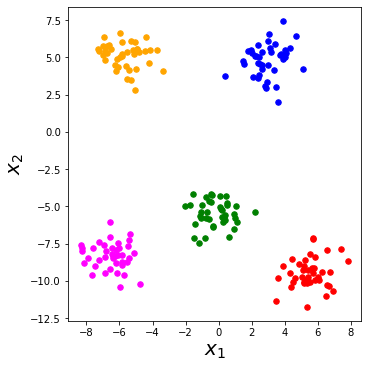

In [4]:
path_save = '/home/rogerio/GIT/rp/author/figs/CapAgrup/sim10BSAS.png'

np.random.seed(10)
agrupamentos = 5
x, y = make_blobs(n_features=2, centers=agrupamentos, n_samples=200)

cores = ['red','blue','green','orange','magenta','cyan','grey','darkred','darkblue','darkcyan']

FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráficos...
ax = fig.add_subplot(spec[0, 0])
for i in range(agrupamentos):
    pos =  np.where(y == i)
    ax.scatter(x[pos, 0], x[pos, 1], marker='o', c=cores[i], s=30)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)

plt.savefig(path_save,dpi=300)
plt.show()

## Avaliação sobre o número de agrupamentos

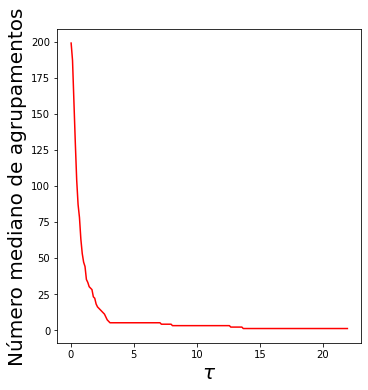

Média:  9.54
Mediana:  3.0


In [5]:
path_save = '/home/rogerio/GIT/rp/author/figs/CapAgrup/grafAgrupsBSAS.png'

#Busca automatica de agrupamentos
minTau, maxTau = find_minmax_tau(x)
steps = 200 #Número de avaliações no intervalo
repeticoes = 10

vecTau = np.linspace(minTau,maxTau,steps)
vecAgrups = []
for tau in vecTau:
    vec = []
    for _ in range(repeticoes):
        rand = np.argsort(np.random.randint(0,1,x.shape[0]))
        randX = np.copy(x[rand,:])
        res = BSAS(x,tau,randX.shape[0])
        vec.append( np.unique(res).shape[0] )
    vecAgrups.append( np.median(vec) )


FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
    
plt.plot(vecTau,vecAgrups,'r-')
#plt.plot( [minTau,maxTau] , [np.mean(vecAgrups),np.mean(vecAgrups)],'g--')

plt.xlabel(r'$\tau$',fontsize=20)
plt.ylabel('Número mediano de agrupamentos',fontsize=20)

plt.savefig(path_save,dpi=300)
plt.show()

print('Média: ', np.mean(vecAgrups))
print('Mediana: ', np.median(vecAgrups))